# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [38]:
cities

['solnechnyy',
 'avarua',
 'nanortalik',
 'padang',
 'rikitea',
 'ushuaia',
 'busselton',
 'carnarvon',
 'atuona',
 'prainha',
 'hasilpur',
 'vaini',
 'northam',
 'kidal',
 'taolanaro',
 'provideniya',
 'kokemaki',
 'nikolskoye',
 'sept-iles',
 'castro',
 'aquiraz',
 'seljord',
 'geraldton',
 'orguz',
 'berlevag',
 'zaragoza',
 'barrow',
 'cabo san lucas',
 'tasiilaq',
 'port hardy',
 'hobart',
 'mahebourg',
 'hihifo',
 'mumford',
 'vostok',
 'vila velha',
 'albany',
 'narsaq',
 'ahipara',
 'morros',
 'talagang',
 'belushya guba',
 'noginsk',
 'dolny kubin',
 'butaritari',
 'marsh harbour',
 'odweyne',
 'saint george',
 'tiksi',
 'thompson',
 'gatesville',
 'wazzan',
 'bredasdorp',
 'kodiak',
 'kouroussa',
 'ajaccio',
 'east london',
 'bambous virieux',
 'new norfolk',
 'hambantota',
 'zapolyarnyy',
 'jadu',
 'caravelas',
 'saint-philippe',
 'mayo',
 'luderitz',
 'esperance',
 'bluff',
 'tsnori',
 'roald',
 'hermanus',
 'chuy',
 'pacifica',
 'nouadhibou',
 'chokurdakh',
 'torbay',
 'ka

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
print("Beginning Data Retrieval")
print("-----------------------------")

data_list = []
for x in range(len(cities)):
    print(f"Making request number: {x} for city: {cities[x]}")

    url = "http://api.openweathermap.org/data/2.5/weather?q="+cities[x]+"&appid="+weather_api_key
    #print(url)
    
    data = requests.get(url).json()
    if data['cod'] == '404':
        print('City not found. Skipping...')       
    else:
        data_list.append(data)    
    
print("-----------------------------")
print("Data Retrieval Complete")




Beginning Data Retrieval
-----------------------------
Making request number: 0 for city: solnechnyy
Making request number: 1 for city: avarua
Making request number: 2 for city: nanortalik
Making request number: 3 for city: padang
Making request number: 4 for city: rikitea
Making request number: 5 for city: ushuaia
Making request number: 6 for city: busselton
Making request number: 7 for city: carnarvon
Making request number: 8 for city: atuona
Making request number: 9 for city: prainha
Making request number: 10 for city: hasilpur
Making request number: 11 for city: vaini
Making request number: 12 for city: northam
Making request number: 13 for city: kidal
Making request number: 14 for city: taolanaro
City not found. Skipping...
Making request number: 15 for city: provideniya
Making request number: 16 for city: kokemaki
Making request number: 17 for city: nikolskoye
Making request number: 18 for city: sept-iles
Making request number: 19 for city: castro
Making request number: 20 for ci

Making request number: 173 for city: norman wells
Making request number: 174 for city: carutapera
Making request number: 175 for city: rancho palos verdes
Making request number: 176 for city: almeirim
Making request number: 177 for city: illoqqortoormiut
City not found. Skipping...
Making request number: 178 for city: sucre
Making request number: 179 for city: makakilo city
Making request number: 180 for city: neiafu
Making request number: 181 for city: namibe
Making request number: 182 for city: kankaanpaa
Making request number: 183 for city: samarai
Making request number: 184 for city: paramonga
Making request number: 185 for city: hasaki
Making request number: 186 for city: itoman
Making request number: 187 for city: kavieng
Making request number: 188 for city: lieksa
Making request number: 189 for city: vaitupu
City not found. Skipping...
Making request number: 190 for city: asha
Making request number: 191 for city: qaanaaq
Making request number: 192 for city: broome
Making request

Making request number: 343 for city: sarandi
Making request number: 344 for city: uvat
Making request number: 345 for city: port moresby
Making request number: 346 for city: darapidap
Making request number: 347 for city: west plains
Making request number: 348 for city: lamu
Making request number: 349 for city: adre
Making request number: 350 for city: tefe
Making request number: 351 for city: vestmannaeyjar
Making request number: 352 for city: strezhevoy
Making request number: 353 for city: mayumba
Making request number: 354 for city: sinop
Making request number: 355 for city: louga
Making request number: 356 for city: port elizabeth
Making request number: 357 for city: mys shmidta
City not found. Skipping...
Making request number: 358 for city: tarudant
City not found. Skipping...
Making request number: 359 for city: nabire
Making request number: 360 for city: corinth
Making request number: 361 for city: inhambane
Making request number: 362 for city: osoyoos
Making request number: 363

Making request number: 513 for city: ponta do sol
Making request number: 514 for city: chagda
City not found. Skipping...
Making request number: 515 for city: pekan
Making request number: 516 for city: cosala
Making request number: 517 for city: peniche
Making request number: 518 for city: yarmouth
Making request number: 519 for city: tacuarembo
Making request number: 520 for city: piacabucu
Making request number: 521 for city: sabha
Making request number: 522 for city: chegem
Making request number: 523 for city: zemaiciu naumiestis
Making request number: 524 for city: aktau
Making request number: 525 for city: bilma
Making request number: 526 for city: nemea
Making request number: 527 for city: shahr-e babak
Making request number: 528 for city: ucluelet
Making request number: 529 for city: luanda
Making request number: 530 for city: nishihara
Making request number: 531 for city: myitkyina
Making request number: 532 for city: goma
Making request number: 533 for city: igarka
Making requ

In [40]:
data_list[2]

{'coord': {'lon': -45.24, 'lat': 60.14},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 279.61,
  'feels_like': 278.13,
  'temp_min': 279.61,
  'temp_max': 279.61,
  'pressure': 1002,
  'humidity': 95,
  'sea_level': 1002,
  'grnd_level': 1002},
 'visibility': 5199,
 'wind': {'speed': 0.72, 'deg': 221},
 'rain': {'1h': 0.12},
 'clouds': {'all': 100},
 'dt': 1596517973,
 'sys': {'country': 'GL', 'sunrise': 1596523750, 'sunset': 1596583489},
 'timezone': -7200,
 'id': 3421765,
 'name': 'Nanortalik',
 'cod': 200}

In [41]:
def data_construction(data):
    try:
        data_new = {
        "City": data['name'],
        "Lat": data['coord']['lat'],
        "Lon": data['coord']['lon'],
        "Max Temp": data['main']['temp_max'],
        "Humidity": data['main']['humidity'],
        "Cloudiness": data['clouds']['all'],
        "Wind Speed": data['wind']['speed'],
        "Country": data['sys']['country'],
        "Date": data['dt']            
    }
        

    except KeyError:
        return {}
    
    return data_new
 
#data_construction(data_list[100])
weather_data = [data_construction(data) for data in data_list]
weather_data

[{'City': 'Solnechnyy',
  'Lat': 50.72,
  'Lon': 136.63,
  'Max Temp': 284.07,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 3.81,
  'Country': 'RU',
  'Date': 1596517972},
 {'City': 'Avarua',
  'Lat': -21.21,
  'Lon': -159.78,
  'Max Temp': 294.15,
  'Humidity': 77,
  'Cloudiness': 85,
  'Wind Speed': 1,
  'Country': 'CK',
  'Date': 1596517973},
 {'City': 'Nanortalik',
  'Lat': 60.14,
  'Lon': -45.24,
  'Max Temp': 279.61,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 0.72,
  'Country': 'GL',
  'Date': 1596517973},
 {'City': 'Padang',
  'Lat': -0.95,
  'Lon': 100.35,
  'Max Temp': 298.85,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 3.45,
  'Country': 'ID',
  'Date': 1596517749},
 {'City': 'Rikitea',
  'Lat': -23.12,
  'Lon': -134.97,
  'Max Temp': 295.99,
  'Humidity': 87,
  'Cloudiness': 79,
  'Wind Speed': 6.35,
  'Country': 'PF',
  'Date': 1596517974},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lon': -68.3,
  'Max Temp': 280.15,
  'Humidity': 48,
  'Cloudi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_data = pd.DataFrame(weather_data)
weather_data
weather_data.to_csv('weather_data.csv')

In [43]:
weather_data.count()

City          572
Lat           572
Lon           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [44]:
weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solnechnyy,50.72,136.63,284.07,93,100,3.81,RU,1596517972
1,Avarua,-21.21,-159.78,294.15,77,85,1.00,CK,1596517973
2,Nanortalik,60.14,-45.24,279.61,95,100,0.72,GL,1596517973
3,Padang,-0.95,100.35,298.85,84,100,3.45,ID,1596517749
4,Rikitea,-23.12,-134.97,295.99,87,79,6.35,PF,1596517974


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
humidity_filter = weather_data['Humidity'] > 100
is_True = 'True' in humidity_filter
is_True

False

In [46]:
weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.946084,16.253986,293.708182,72.681818,52.041958,3.626783,1.596518e+09
std,33.380399,90.330657,7.491579,19.802974,38.668853,2.332499,1.272614e+02
min,-54.800000,-179.170000,269.420000,9.000000,0.000000,0.190000,1.596518e+09
25%,-7.027500,-63.015000,288.310000,61.000000,10.000000,1.747500,1.596518e+09
50%,25.450000,20.750000,294.150000,77.000000,62.500000,3.100000,1.596518e+09
75%,50.065000,91.452500,299.262500,87.000000,90.000000,4.955000,1.596518e+09
max,78.220000,178.420000,312.860000,100.000000,100.000000,13.900000,1.596518e+09


In [47]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = weather_data.index[weather_data['Humidity'] > 100]
outlier_index

Int64Index([], dtype='int64')

In [48]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solnechnyy,50.72,136.63,284.07,93,100,3.81,RU,1596517972
1,Avarua,-21.21,-159.78,294.15,77,85,1.00,CK,1596517973
2,Nanortalik,60.14,-45.24,279.61,95,100,0.72,GL,1596517973
3,Padang,-0.95,100.35,298.85,84,100,3.45,ID,1596517749
4,Rikitea,-23.12,-134.97,295.99,87,79,6.35,PF,1596517974


In [49]:
# Extract relevant fields from the data frame
clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))
clean_city_data['Date']
# Export the City_Data into a csv
clean_city_data.to_csv('clean_city_data.csv')


In [50]:
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solnechnyy,50.72,136.63,284.07,93,100,3.81,RU,2020-08-04
1,Avarua,-21.21,-159.78,294.15,77,85,1.00,CK,2020-08-04
2,Nanortalik,60.14,-45.24,279.61,95,100,0.72,GL,2020-08-04
3,Padang,-0.95,100.35,298.85,84,100,3.45,ID,2020-08-04
4,Rikitea,-23.12,-134.97,295.99,87,79,6.35,PF,2020-08-04


In [51]:
date = clean_city_data['Date'].unique()
date[0]

'2020-08-04'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [52]:
#plotting function 
def scatter_plot(x, y, item, date):
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.title("City Latitude vs {items}({dates})".format(items = item, dates = date), fontsize = 40)
    plt.xlabel("Latitude", fontsize = 30)
    plt.ylabel(item, fontsize = 30)
    plt.grid()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

# Code explaination 
* The function above is a plotting function that output a scatter plot with a pre-defined format. It takes x and y two lists, x being latitude of differet cities in the dataframe, y being the variable we are looking for relationships with latitude(in this assignemnt y being maximum temperature, humidity, cloudiness and wind speed of that city respectively). Item is a text(string) specifies what y list is (maximum temperature, humidity, cloudiness or wind speed), date is datetime string which will be shown in the title of the plotting. This sactter plots shows the relationship between latitude and the other 4 variables for 590 cities in the dataframe.

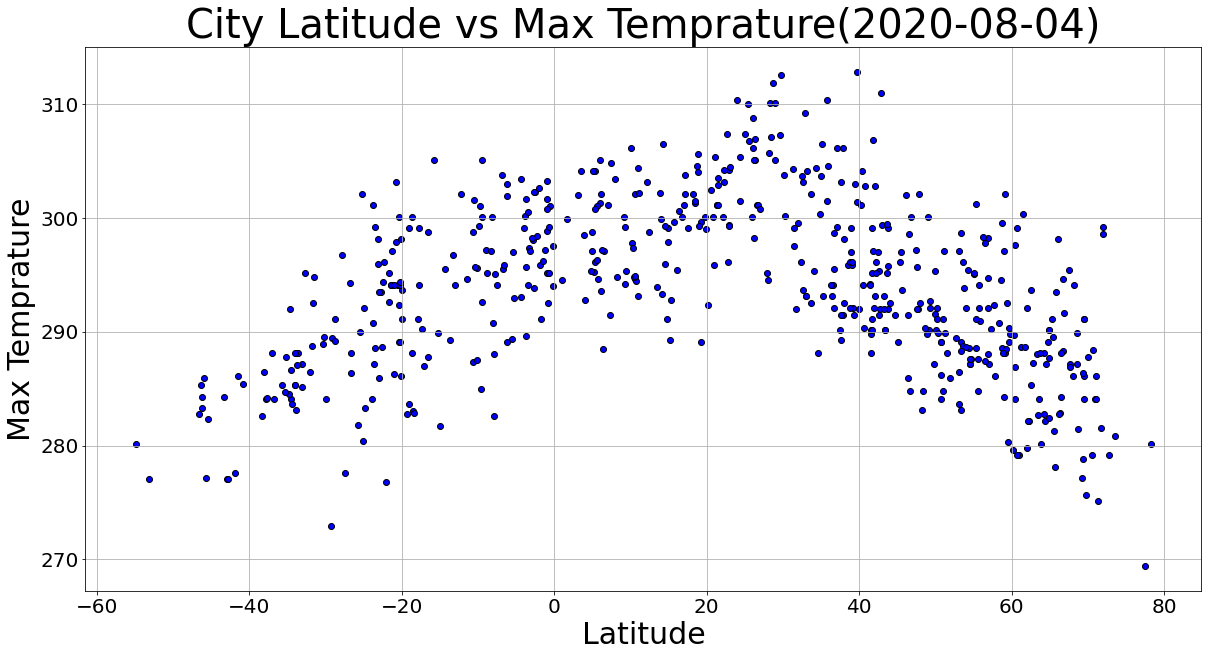

In [53]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Max Temp'], 'Max Temprature', date[0] )

* The above plot indicates that among more than 500 cities, the maximum temperature is the highest around 0 to 20 latitude area (around equatorial), further from the equatorial the maximum temperatue decreases. 

## Latitude vs. Humidity Plot

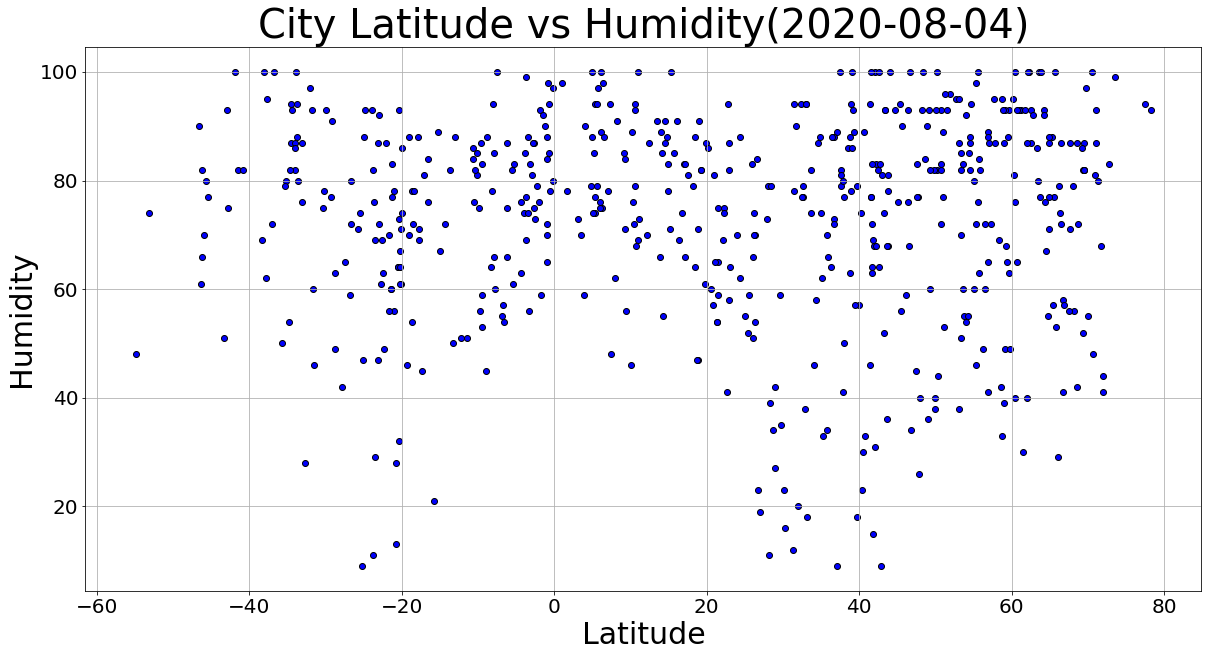

In [54]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Humidity'], 'Humidity', date[0] )

* The above plot indicates that among more than 500 cities, the humidity of more than half of the cities is in the range of 60 to 100, with the rest humidity in the range of 0 to 50 cluster around -20 and 40 latitude areas.  

## Latitude vs. Cloudiness Plot

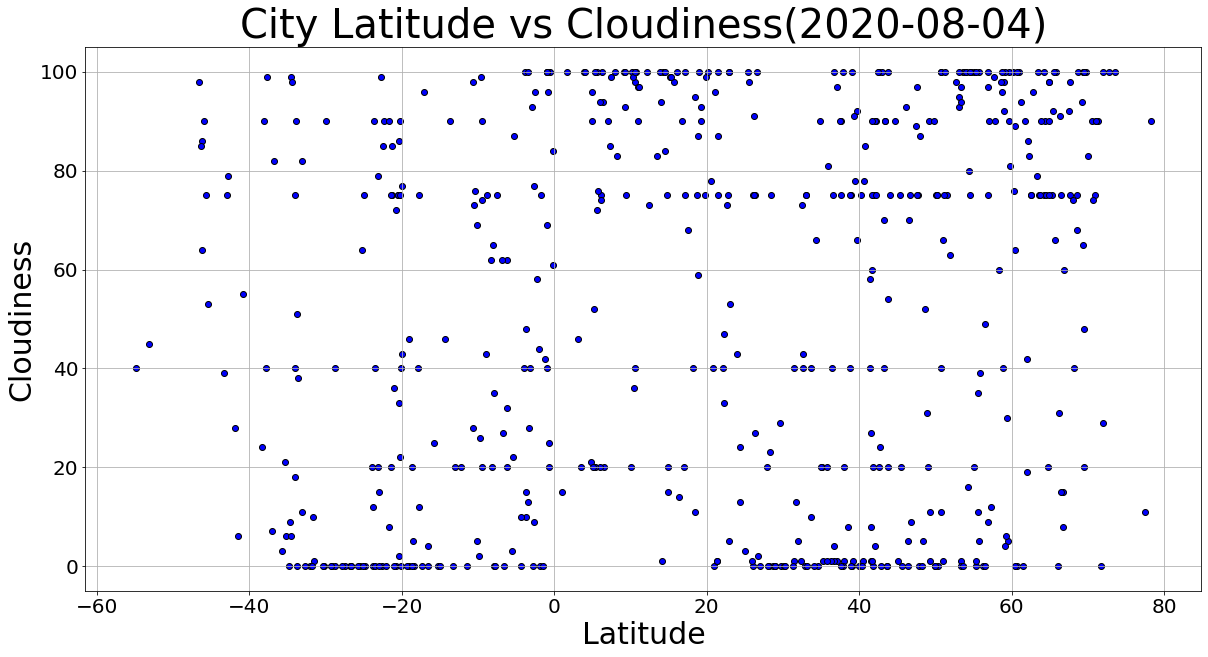

In [55]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Cloudiness'], 'Cloudiness', date[0] )

* From the above plot, there is no obvious relationships between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

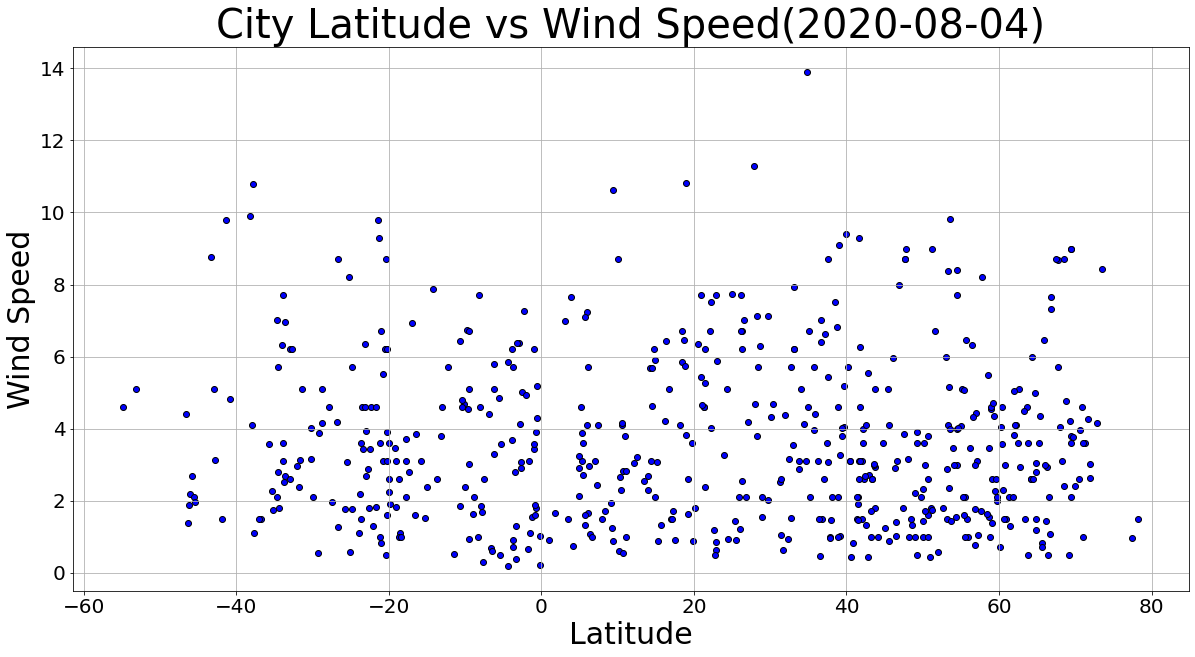

In [56]:
scatter_plot(clean_city_data['Lat'], clean_city_data['Wind Speed'], 'Wind Speed', date[0] )

* From the above plot, the speed of wind of majority of the cities in the range from 0 to 12 cross all latitude indicating latitude may not be a factor that affect the speed of the wind. There are 3 cities with speed of wind above 14 in the area which latitude between 20 to 40.

## Linear Regression

In [57]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue, pvalue, stderr
    

In [58]:
def reg_plot(x, y, regress_values, line_eq, item, rvalue):
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x,regress_values,"r-", label = line_eq)
    
    #plt.annotate(line_eq, ((x.max())/2,regress_values/2), fontsize=10, color = "red")
    plt.xlabel("Latitude", fontsize = 30)
    plt.ylabel(item, fontsize = 30)
    plt.legend(fontsize=30)
    plt.grid()
    print(f"The r-squared is: {rvalue**2}")

In [59]:
# Create Northern and Southern Hemisphere DataFrames
Northern = clean_city_data[clean_city_data['Lat'] >= 0]
Southern = clean_city_data[clean_city_data['Lat'] <= 0]
Southern

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Avarua,-21.21,-159.78,294.15,77,85,1.00,CK,2020-08-04
3,Padang,-0.95,100.35,298.85,84,100,3.45,ID,2020-08-04
4,Rikitea,-23.12,-134.97,295.99,87,79,6.35,PF,2020-08-04
5,Ushuaia,-54.80,-68.30,280.15,48,40,4.60,AR,2020-08-04
6,Busselton,-33.65,115.33,288.15,88,51,2.68,AU,2020-08-04
...,...,...,...,...,...,...,...,...,...
553,Santa Fe,-31.63,-60.70,292.59,60,10,3.13,AR,2020-08-04
559,Mokhotlong,-29.29,29.07,272.94,77,0,0.54,LS,2020-08-04
563,Alto Araguaia,-17.31,-53.22,290.26,45,0,2.81,BR,2020-08-04
565,Palmares do Sul,-30.26,-50.51,288.91,75,0,3.16,BR,2020-08-04


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [60]:
regress_values = regression(Northern['Lat'], Northern['Max Temp'])[0]
line_eq = regression(Northern['Lat'], Northern['Max Temp'])[1]
rvalue = regression(Northern['Lat'], Northern['Max Temp'])[2]
pvalue = regression(Northern['Lat'], Northern['Max Temp'])[3]


In [61]:
Northern['Lat'].max()

78.22

The r-squared is: 0.4091940906540815


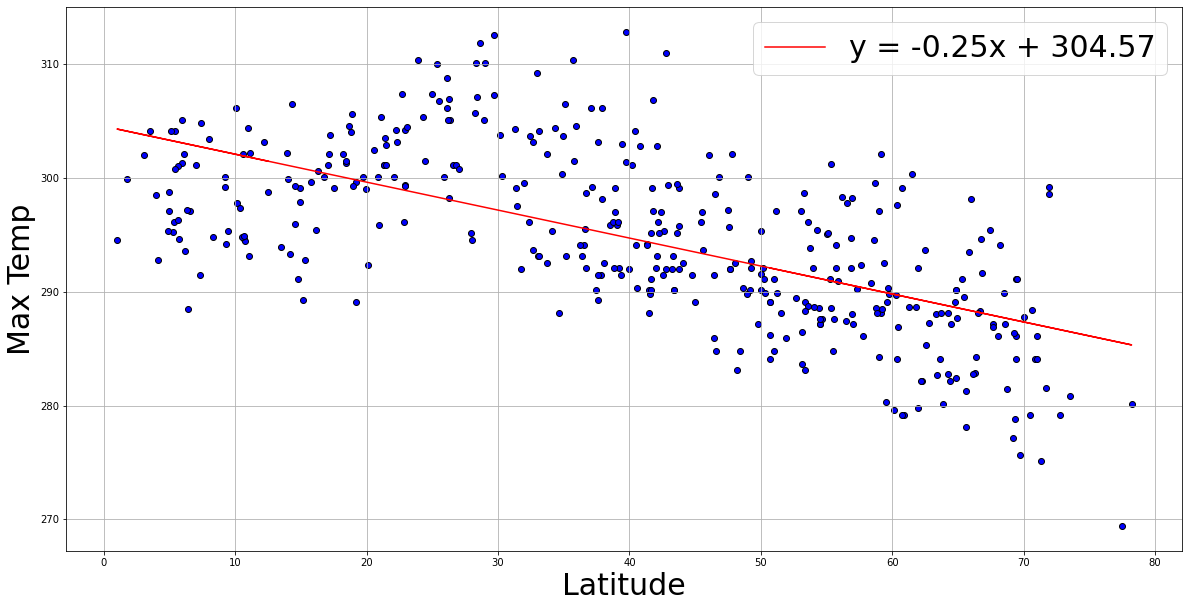

In [62]:
reg_plot(Northern['Lat'], Northern['Max Temp'], regress_values, line_eq, "Max Temp", rvalue)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [63]:
regress_values = regression(Southern['Lat'], Southern['Max Temp'])[0]
line_eq = regression(Southern['Lat'], Southern['Max Temp'])[1]
rvalue = regression(Southern['Lat'], Southern['Max Temp'])[2]
pvalue = regression(Southern['Lat'], Southern['Max Temp'])[3]

The r-squared is: 0.45501198341293364


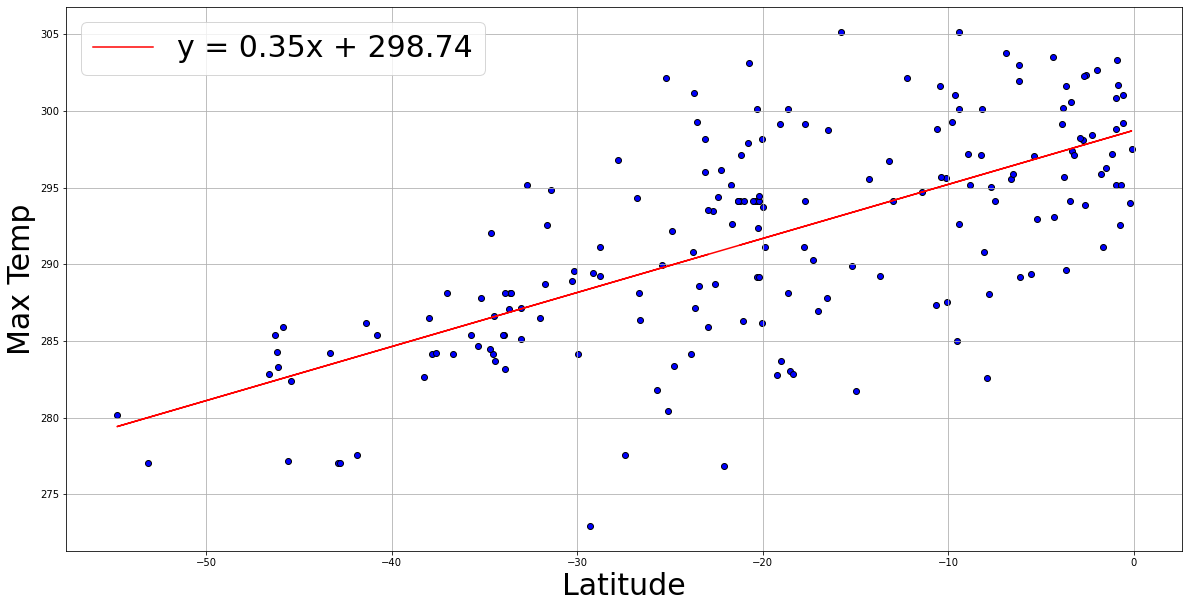

In [64]:
reg_plot(Southern['Lat'], Southern['Max Temp'], regress_values, line_eq, "Max Temp", rvalue)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 8.083906179694155e-05


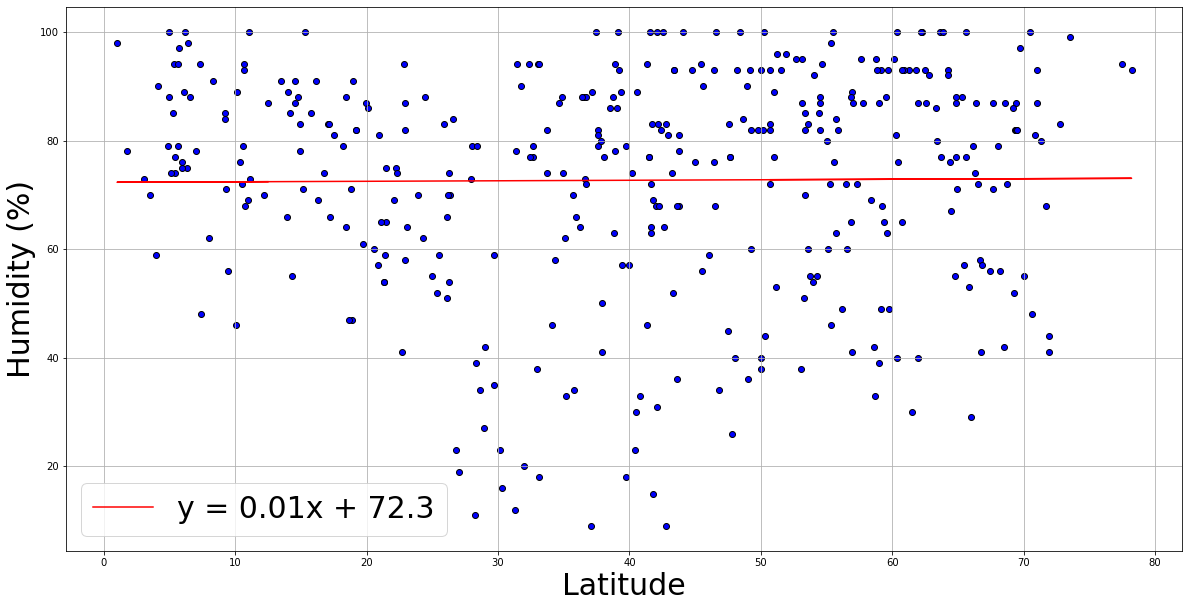

In [65]:
regress_values = regression(Northern['Lat'], Northern['Humidity'])[0]
line_eq = regression(Northern['Lat'], Northern['Humidity'])[1]
rvalue = regression(Northern['Lat'], Northern['Humidity'])[2]
pvalue = regression(Northern['Lat'], Northern['Humidity'])[3]

reg_plot(Northern['Lat'], Northern['Humidity'], regress_values, line_eq, "Humidity (%)", rvalue)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0015861922075276977


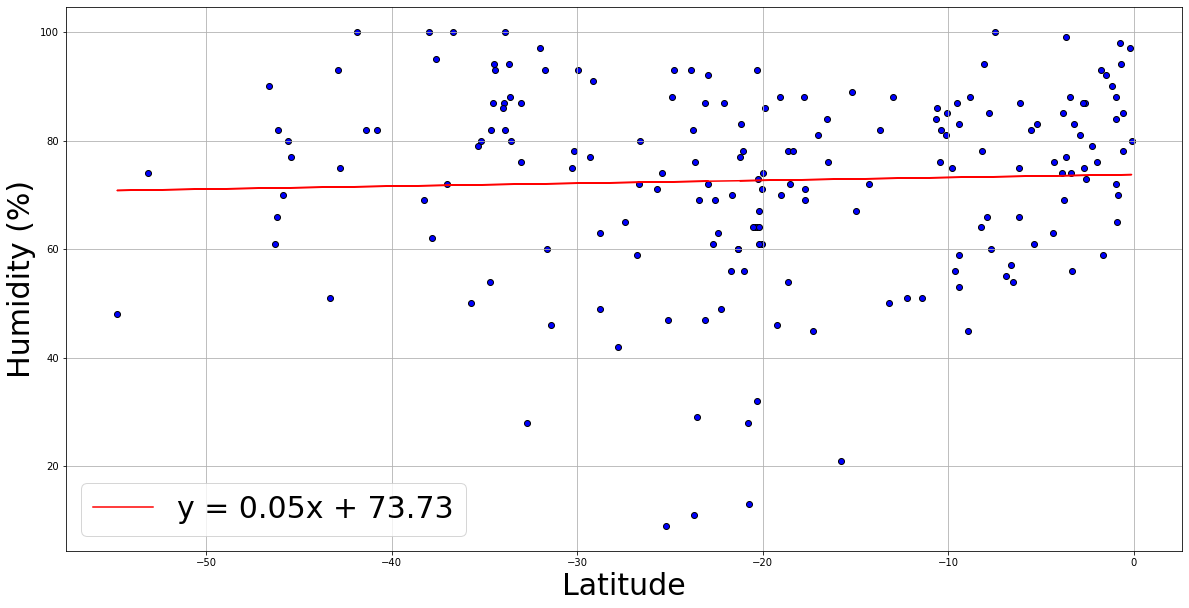

In [66]:
regress_values = regression(Southern['Lat'], Southern['Humidity'])[0]
line_eq = regression(Southern['Lat'], Southern['Humidity'])[1]
rvalue = regression(Southern['Lat'], Southern['Humidity'])[2]
pvalue = regression(Southern['Lat'], Southern['Humidity'])[3]

reg_plot(Southern['Lat'], Southern['Humidity'], regress_values, line_eq, "Humidity (%)", rvalue)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000757122966271231


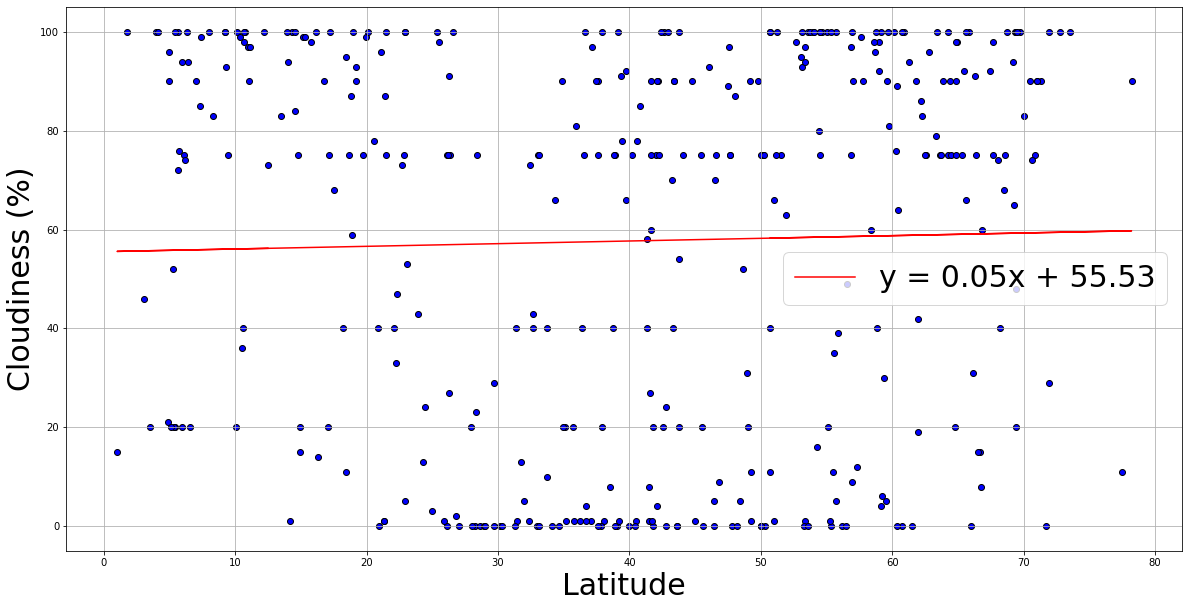

In [67]:
regress_values = regression(Northern['Lat'], Northern['Cloudiness'])[0]
line_eq = regression(Northern['Lat'], Northern['Cloudiness'])[1]
rvalue = regression(Northern['Lat'], Northern['Cloudiness'])[2]
pvalue = regression(Northern['Lat'], Northern['Cloudiness'])[3]

reg_plot(Northern['Lat'], Northern['Cloudiness'], regress_values, line_eq, "Cloudiness (%)", rvalue)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0014471762511679119


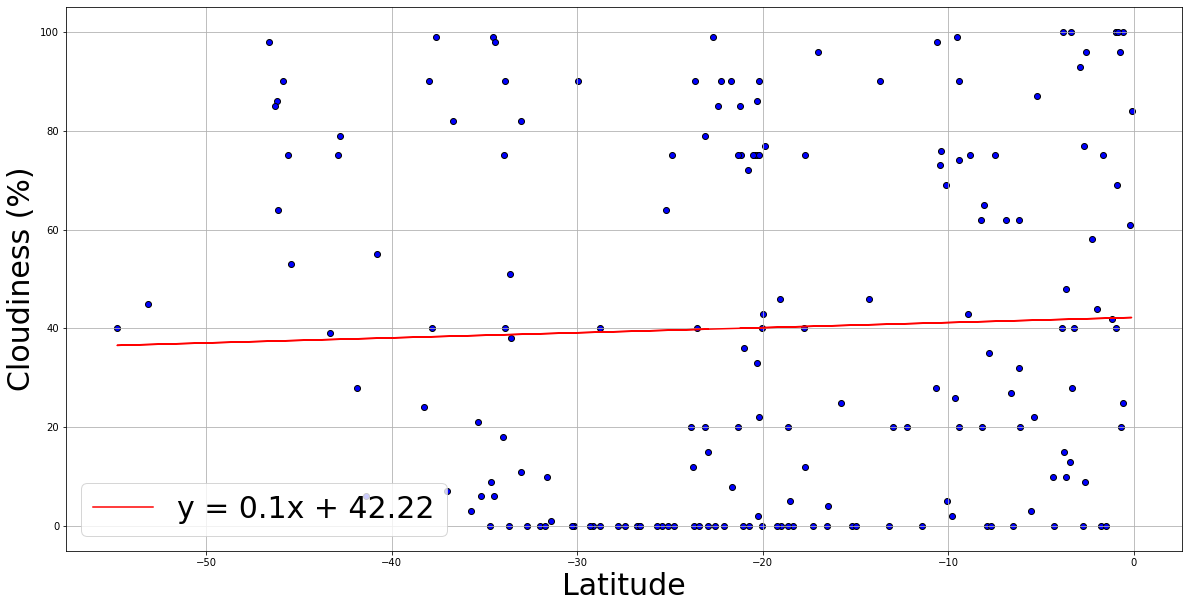

In [68]:
regress_values = regression(Southern['Lat'], Southern['Cloudiness'])[0]
line_eq = regression(Southern['Lat'], Southern['Cloudiness'])[1]
rvalue = regression(Southern['Lat'], Southern['Cloudiness'])[2]
pvalue = regression(Southern['Lat'], Southern['Cloudiness'])[3]

reg_plot(Southern['Lat'], Southern['Cloudiness'], regress_values, line_eq, "Cloudiness (%)", rvalue)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001014023680789544


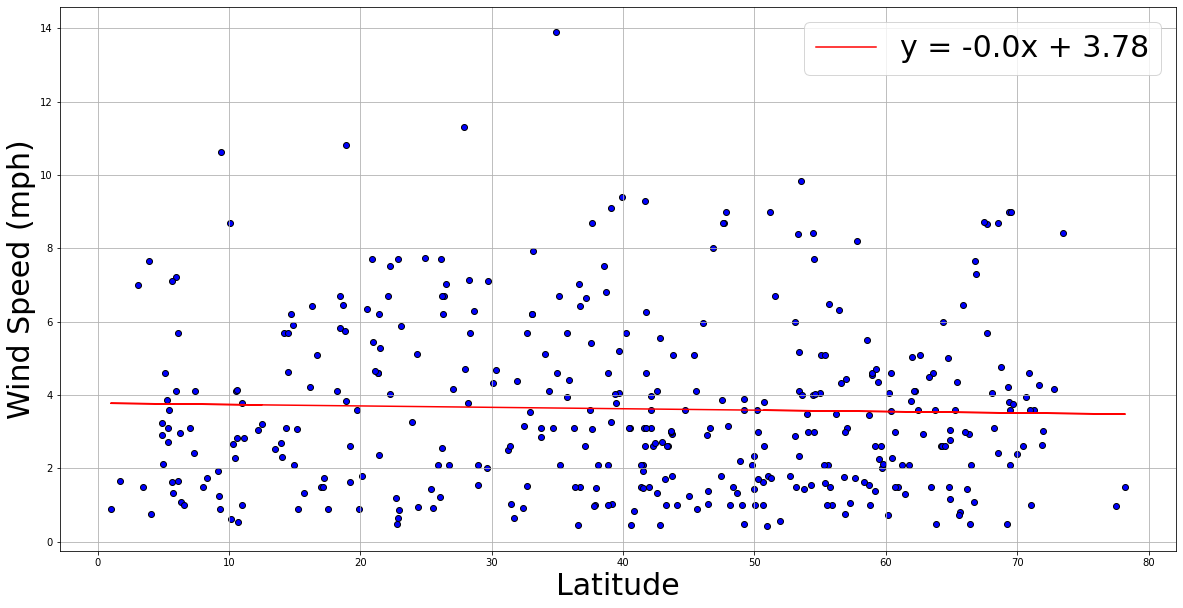

In [69]:
regress_values = regression(Northern['Lat'], Northern['Wind Speed'])[0]
line_eq = regression(Northern['Lat'], Northern['Wind Speed'])[1]
rvalue = regression(Northern['Lat'], Northern['Wind Speed'])[2]
pvalue = regression(Northern['Lat'], Northern['Wind Speed'])[3]

reg_plot(Northern['Lat'], Northern['Wind Speed'], regress_values, line_eq, "Wind Speed (mph)", rvalue)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014689563731846446


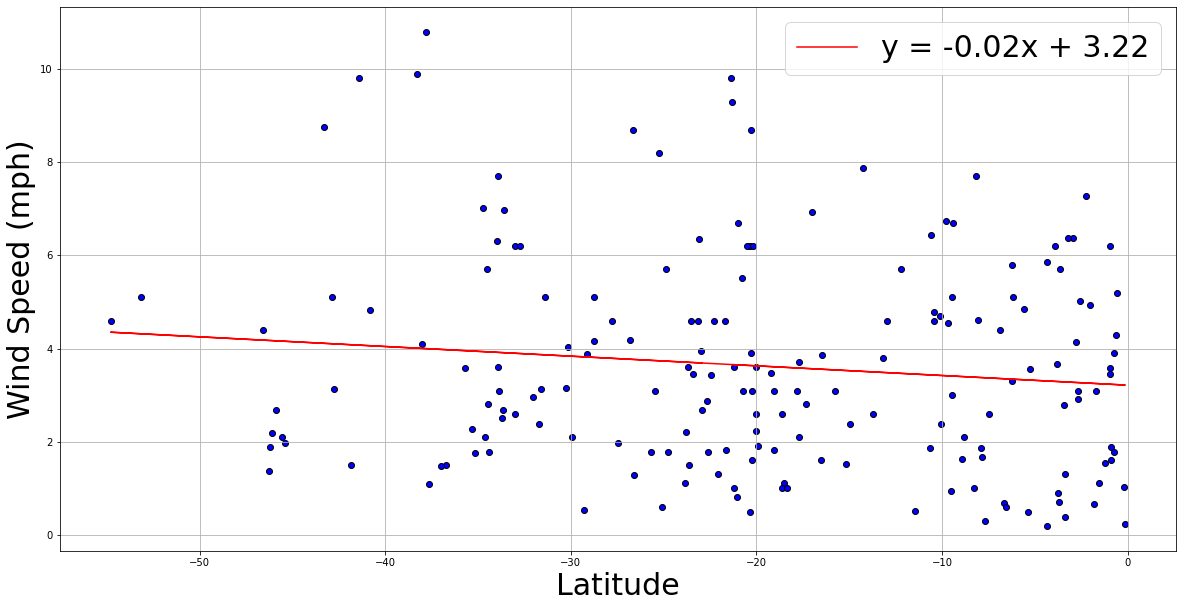

In [70]:
regress_values = regression(Southern['Lat'], Southern['Wind Speed'])[0]
line_eq = regression(Southern['Lat'], Southern['Wind Speed'])[1]
rvalue = regression(Southern['Lat'], Southern['Wind Speed'])[2]
pvalue = regression(Southern['Lat'], Southern['Wind Speed'])[3]

reg_plot(Southern['Lat'], Southern['Wind Speed'], regress_values, line_eq, "Wind Speed (mph)", rvalue)